In [1]:
using ControlSystems
using Plots
using LinearAlgebra

In [3]:
s = tf("s")

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Int64}}
s
-
1

Continuous-time transfer function model

## Guía I

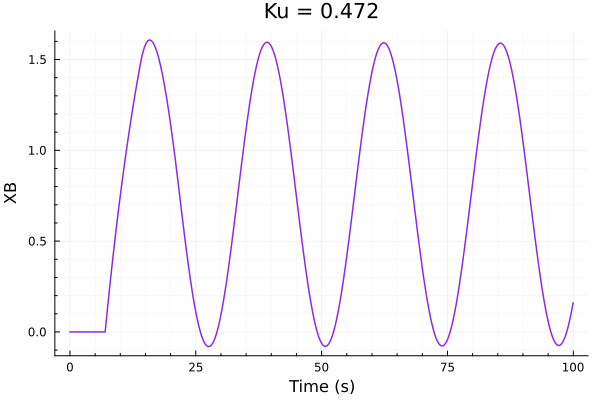

In [4]:
# 1.1

# dada la columna de w&b
# xB − R

## determinación de parámetros últimos mediante método de oscilaciones sostenidas de Ziegler & Nichols

g = tf(6.6, [10.9, 1])*exp(-s*7)

Ku = 0.472
Tu = 19

zn = tf([Ku], [1])
sys_zn = feedback(g*zn)
step_sys_zn = step(sys_zn, 100)


plot(step_sys_zn, ylabel="XB", color="blueviolet", linewidth=1.5)
plot!(title="Ku = 0.472")
plot!(minorgrid=true)

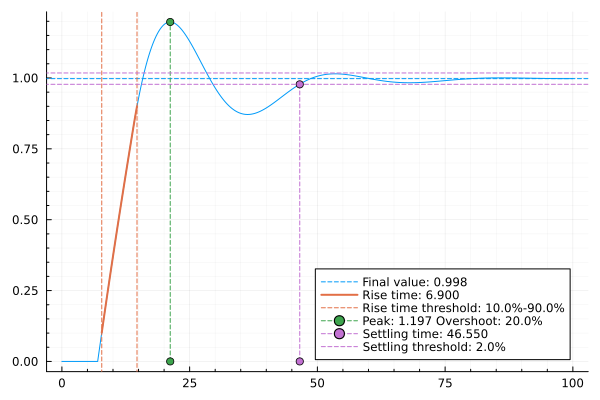

In [5]:
## determinación de los parámetros del controlador 

Kp = 0.45 * Ku
Ti = 0.83 * Tu

c = tf([Kp], [1]) + tf([Kp], [Ti, 0])

sys = feedback(g*c)

step_sys = step(sys, 100)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

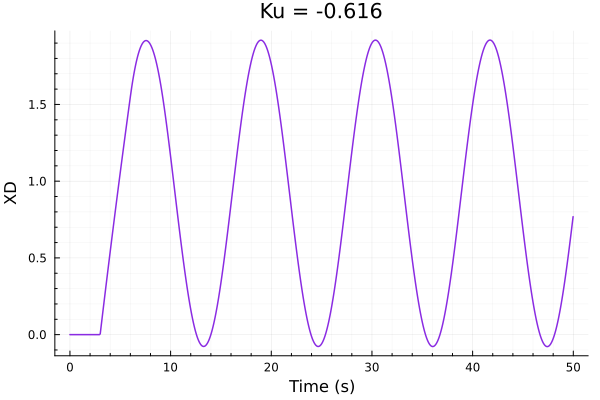

In [6]:
# xR − S

## determinación de parámetros últimos mediante método de oscilaciones sostenidas de Ziegler & Nichols

g = tf(-18.9, [21, 1])*exp(-s*3)

Ku = -0.616
Tu = 10

zn = tf([Ku], [1])
sys_zn = feedback(g*zn)
step_sys_zn = step(sys_zn, 50)


plot(step_sys_zn, ylabel="XD", color="blueviolet", linewidth=1.5)
plot!(title="Ku = -0.616")
plot!(minorgrid=true)

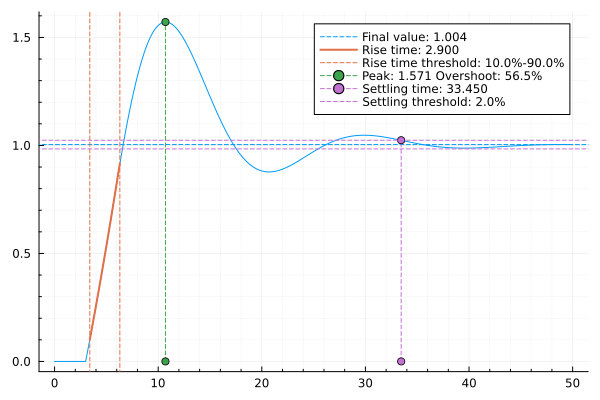

In [7]:
## determinación de los parámetros del controlador

Kp = 0.45 * Ku
Ti = 0.83 * Tu

c = tf([Kp], [1]) + tf([Kp], [Ti, 0])
sys = feedback(g*c)

step_sys = step(sys, 50)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

In [56]:
g11 = tf(12.8, [16.7, 1])#*exp(-s)
g12 = tf(-18.9, [21, 1])#*exp(-s*3)
g21 = tf(6.6, [10.9, 1])#*exp(-s*7)
g22 = tf(-19.4, [14.4, 1])#*exp(-s*3)

P = [g11 g12; g21 g22]

Ku = 0.472;
Tu = 19;
Kp1 = 0.45 * Ku;
Ti1 = 0.83 * Tu;


Ku2 = -0.616;
Tu2 = 10;
Kp2 = 0.45*Ku2;
Ti2 = 0.83*Tu2;

c11 = 0
c12= tf([Kp1], [1]) + tf([Kp1], [Ti1, 0])
c21= tf([Kp2], [1]) + tf([Kp2], [Ti2, 0])
c22 = 0

C = [c11 c12; c21 c22]

feedback(C, P, W2=:, Z2=:, Zperm=[(1:P.ny).+P.nu; 1:P.nu]) ## no method matching feedback

LoadError: MethodError: no method matching feedback(::TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}, ::TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}; W2=Colon(), Z2=Colon(), Zperm=[3, 4, 1, 2])
[0mClosest candidates are:
[0m  feedback(::TransferFunction{<:ControlSystemsBase.TimeEvolution, <:ControlSystemsBase.SisoRational}, ::TransferFunction{<:ControlSystemsBase.TimeEvolution, <:ControlSystemsBase.SisoRational}; pos_feedback) at ~/.julia/packages/ControlSystemsBase/eWEYr/src/connections.jl:227[91m got unsupported keyword arguments "W2", "Z2", "Zperm"[39m
[0m  feedback(::TransferFunction, ::TransferFunction; pos_feedback) at ~/.julia/packages/ControlSystemsBase/eWEYr/src/connections.jl:225[91m got unsupported keyword arguments "W2", "Z2", "Zperm"[39m
[0m  feedback(::Union{Number, LTISystem, AbstractMatrix{<:Number}}, ::Union{Number, LTISystem, AbstractMatrix{<:Number}}; kwargs...) at ~/.julia/packages/ControlSystemsBase/eWEYr/src/types/Lti.jl:34
[0m  ...

In [57]:
sys = feedback(P, C)

## dado que no encontré como conectar sistemas mimo, para las simulaciones me pasé a matlab

LoadError: MIMO TransferFunction feedback isn't implemented.

In [8]:
# 1.2

G0 = [1 1; -0.2 0.8];

GA = G0.*transpose((inv(G0)))

2×2 Matrix{Float64}:
 0.8  0.2
 0.2  0.8

In [9]:
# 1.3

# Columna de Vinante y Luyben
G0 = [-2.2 1.3; -2.8 4.3];

RGA = G0.*transpose((inv(G0)))

2×2 Matrix{Float64}:
  1.62543  -0.62543
 -0.62543   1.62543

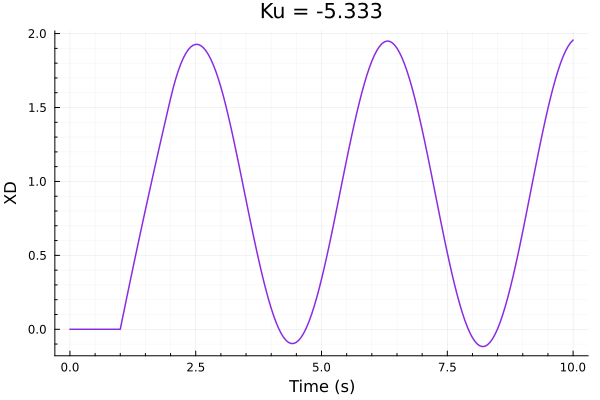

In [10]:
# 1.4
# Esquema Xd-R // Xb-S

xdr = tf([-2.2], [7, 1])*exp(-s)
xbs = tf([4.3], [9.2, 1])*exp(-s*0.35)

Ku = -5.33
Tu = 3.4

zn = tf([Ku], [1])
sys_zn = feedback(xdr*zn)
step_sys_zn = step(sys_zn, 10)

plot(step_sys_zn, ylabel="XD", color="blueviolet", linewidth=1.5)
plot!(title="Ku = -5.333")
plot!(minorgrid=true)

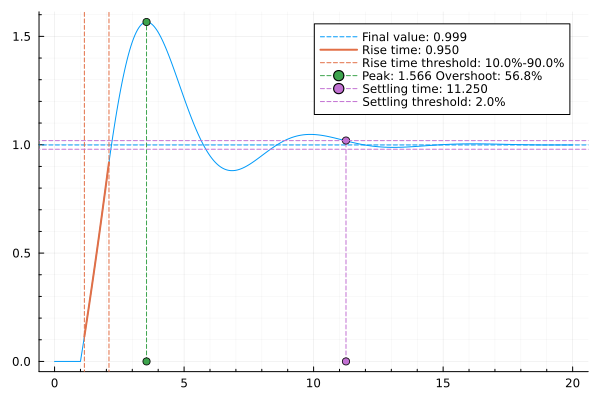

In [11]:
## determinación de los parámetros del controlador

Kp = 0.45 * Ku
Ti = 0.83 * Tu

c = tf([Kp], [1]) + tf([Kp], [Ti, 0])
g = xdr
sys = feedback(g*c)

step_sys = step(sys, 20)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

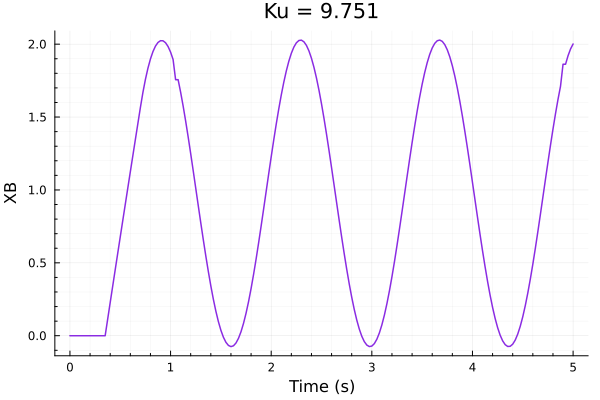

In [12]:
# oscilaciones xb

Ku = 9.751
Tu = 1.3

zn = tf([Ku], [1])
sys_zn = feedback(xbs*zn)
step_sys_zn = step(sys_zn, 5)

plot(step_sys_zn, ylabel="XB", color="blueviolet", linewidth=1.5)
plot!(title="Ku = 9.751")
plot!(minorgrid=true)

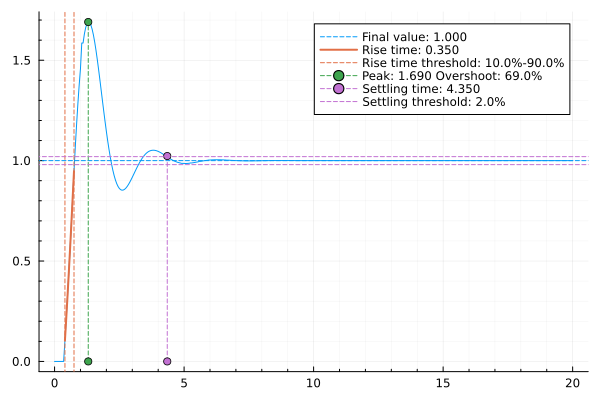

In [13]:
Kp = 0.45 * Ku
Ti = 0.83 * Tu

c = tf([Kp], [1]) + tf([Kp], [Ti, 0])
g = xbs
sys = feedback(g*c)

step_sys = step(sys, 20)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

In [14]:
# 1.5
# Modelo de reactor de polimerizaciôn

G0 = [22.89 -11.64;  4.689 5.8];
G0
GA = G0.*transpose((inv(G0)))

# Dado el compensador simplificado

d12 = -11.64 / 22.89
d21 = -4.689 / 5.8

D0 = [1 d12; d21 1];

Pd = G0.*D0

GA_desacople = Pd.*transpose((inv(Pd)))

GA_desacople

2×2 Matrix{Float64}:
 0.855423  0.144577
 0.144577  0.855423

## Guía II

In [15]:
# 2.1 pendiente


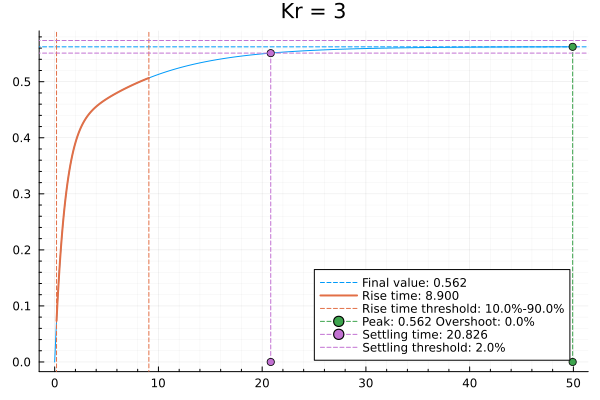

In [16]:
# 2.2 

# a

Kr = 3

sys = tf([30*Kr, 21*Kr, 3*Kr], [200, 60*Kr+160, 42*Kr+34, 6*Kr-2])

step_sys = step(sys, 50)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(title="Kr = 3")
plot!(minorgrid=true)

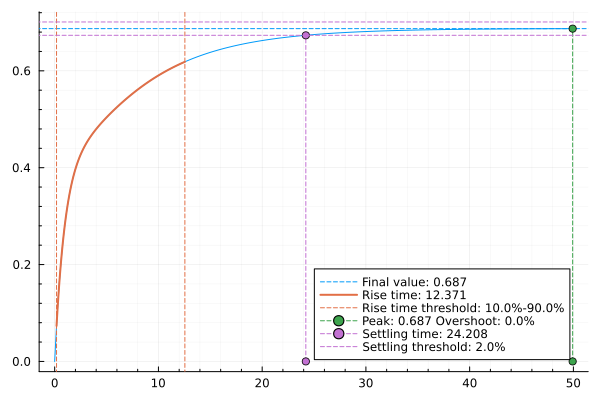

In [17]:
# b, se asume que existe una perturbación en M

sys = tf([90, 63, 11], [200, 340, 160, 16])

step_sys = step(sys, 50)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

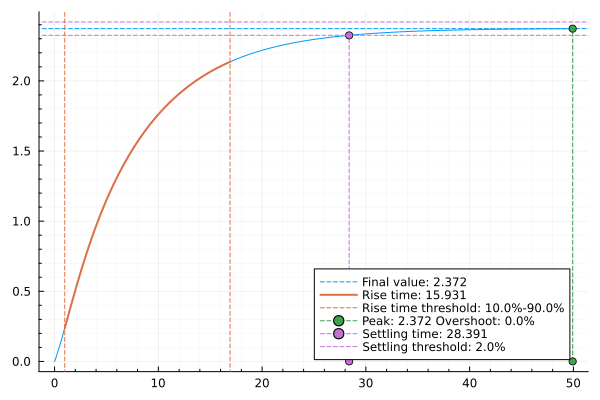

In [18]:
# c, dado el Kr de (a) y la perturbación de M

sys = tf([20, 48, 19], [100, 170, 80, 8])

step_sys = step(sys, 50)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

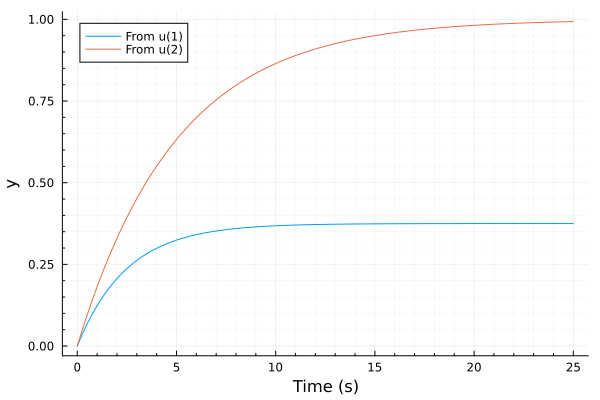

In [21]:
# d, incluyendo compensador

Kr = 1

sys = tf([1.5*Kr], [10, 1+3*Kr])
sys_2 = tf([1], [5, 1])

step_sys = step([sys sys_2], 25)

plot(step_sys)
plot!(minorgrid=true)

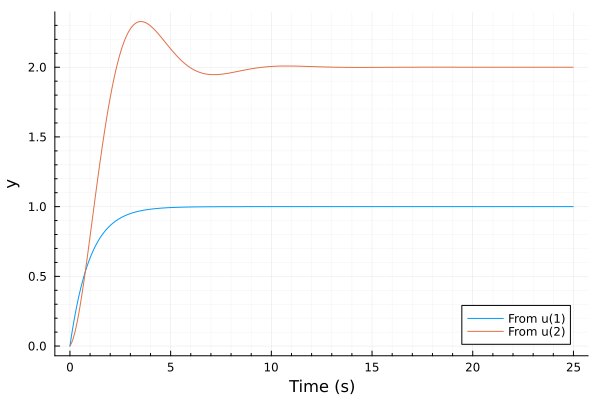

In [23]:
# d, incluyendo la perturbación

Kr = 1

sys = tf([1.5*Kr], [10, 1+3*Kr])

step_sys = step([tf1 tf2], 25)
#step_info = stepinfo(step_sys)

plot(step_sys)
#plot(step_info)
plot!(minorgrid=true)

In [24]:
# 2.3

G0 = [-2.2 1.3; -2.8 4.3];
D = inv(G0).*Diagonal(G0) # .*transpose((inv(G0)))


a = tf([-2.2], [7, 1])#*exp(-s)
b = tf([1.3], [7, 1])#*exp(-0.3*s)
c = tf([-2.8], [9.5, 1])#*exp(-1.8*s)
d = tf([4.3], [9.2, 1])#*exp(-s*0.35)

g = [a b; c d]

#inv(g)


D = inv(G0)*Diagonal(G0) 
D
# 2.4 no

2×2 Matrix{Float64}:
 1.62543  0.960481
 1.05842  1.62543

In [25]:
# 3.1

# Planta base
G0 = [12.8 -18.9; 6.6 -19.4];

# Dado el ejemplo 2.1

D0_compensador = [2.01 2.97; 0.68 2.01];

P_compensador = G0.*D0_compensador

N_compensador = det(P_compensador) / det(Diagonal(P_compensador))

# dado que N = 0.75, es posible alcanzar la estabilidad  con la inclusión de modos integrales

# Dado el ejemplo 2.2

D0_simplificado = [1 1.48; 0.34 1];

P_simplificado = G0.*D0_simplificado

N_simplificado = det(P_simplificado) / det(Diagonal(P_simplificado))

0.7472246778350516

## Guía IV 
ver scripts de matlab

## Guía V
no necesita scripts

## Guía VII

In [40]:
# 7.1

sys = tf([20, 500], [15, 8, 1])
Ts = 0.1
N = 11
uk = ones(N, 1)

## se discretiza el sistema. 
## el parámetro de qué método se utilizará no es necesario (por defecto es zoh), 
## pero me pareció bueno aclarar que se usa el retentor
sys_discrete = c2d(sys, Ts, :zoh) 

## simulación para 10 valores
yk, t, x = step(sys_discrete, 1)

n = 2
k = 2*n + 2


## armado de y_k y phi_k, para la estimación sencilla

Y_k = [yk[k]; yk[k-1];  yk[k-2]; yk[k-3] ] # dim 4x1

Phi_k =[ 
    [-yk[k - 1] -yk[k - 2] uk[k - 1] uk[k - 2]]
    [-yk[k - 2] -yk[k - 3] uk[k - 2] uk[k - 3]]
    [-yk[k - 3] -yk[k - 4] uk[k - 3] uk[k - 4]]
    [-yk[k - 4] -yk[k - 5] uk[k - 4] uk[k - 5]]]    # # dim 2n x 2n


## calculo de theta (y acá vienen los problemas) porque el det(phi_k) eq 0
theta_k = inv(Phi_k) * Y_k


## acá https://gitlab.com/paulaolmedo/control_de_procesos/-/blob/dudas/matlab/Problema_7_1.m está el intento en matlab

LoadError: SingularException(4)

## Guía VII
necesito resolver las dudas de la anterior unidad

## Guía IX
no tiene ejercicios, es teórica

## Guía X

In [41]:
## 10.3

## transformar al sistema continuo en uno discreto (siempre hablando de matrices de estado)
A = [-1 2; 4 -7]
B = [1; 2]
C = [1 0]
D = 0
Ts = 0.1

sys_continuous = ss(A,B,C,D)

sys_discrete = c2d(sys_continuous, Ts, :zoh)

print("Sistema discreto representado en espacio de estados. Ts = 0.1.\n")
print(sys_discrete)
print("\n")

Sistema discreto representado en espacio de estados. Ts = 0.1.
StateSpace{Discrete{Float64}, Float64}
A = 
 0.9349513762366422  0.1378949075450639
 0.2757898150901279  0.5212666536014503
B = 
 0.11183458387344791
 0.16128788760010904
C = 
 1.0  0.0
D = 
 0.0

Sample Time: 0.1 (seconds)
Discrete-time state-space model


In [42]:
## representar al sistema continuo en distintas formas canónicas

## test de controlabilidad (la matriz ? tiene que ser no singular) para el sistema continuo

zeta = [B A*B]
print("Test de controlabilidad para el sistema continuo, se calcula el determinante de zeta \n")
print(det(zeta))
print("\n")

## calculo de la forma canónica controlada
Q = [0 1]*inv(zeta)
T = [Q; Q*A]

A_controlable = T * A * inv(T)
B_controlable = T * B # (es por T o es por Q?)
C_controlable = C / T

sys_controlable_continuo  = ss(A_controlable, B_controlable, C_controlable, D)

print("Sistema continuo representado en la forma canónica controlable: \n")
print(sys_controlable_continuo)
print("\n")

## calculo de la forma canónica observada
## faltaría hacer el test de observabilidad...


A_obs = transpose(A_controlable)
B_obs = transpose(C_controlable)
C_obs = transpose(B_controlable)

sys_observable_continuo = ss(A_controlable, B_controlable, C_controlable, D)

print("Sistema continuo representado en la forma canónica observable: \n")
print(sys_observable_continuo)
print("\n")

## calculo de la forma canónica de Jordan

## para esto me tuve que pasar a octave/matlab nuevamente, 
## porque no encontré una forma sencilla en julia de hacer expansión en fracciones parciales
## encontré el repositorio RationalFunctions, pero nunca fue aceptado como paquete, por lo tanto no recomiendo usarlo
## encontré CalculusWithJulia, que hereda algunas funciones de SimPy, pero tiene conflictos con algunos identificadores

## script de octave:
#[num, den] = ss2tf(A, B, C, D);
#[c, p] = residue(num, den);

#A_jordan = [p(1) 0; 0 p(2)];
#B_jordan = [1; 1];
#C_jordan = [c(1) c(2)];
#sys_jordan = ss(A_jordan, B_jordan, C_jordan, D);

Test de controlabilidad para el sistema continuo, se calcula el determinante de zeta 
-16.0
Sistema continuo representado en la forma canónica controlable: 
StateSpace{Continuous, Float64}
A = 
 0.0   1.0
 1.0  -8.0
B = 
 0.0
 1.0
C = 
 11.0  1.0
D = 
 0.0

Continuous-time state-space model
Sistema continuo representado en la forma canónica observable: 
StateSpace{Continuous, Float64}
A = 
 0.0   1.0
 1.0  -8.0
B = 
 0.0
 1.0
C = 
 11.0  1.0
D = 
 0.0

Continuous-time state-space model


In [43]:
## representar al sistema discreto en distintas formas canónicas

## test de controlabilidad (la matriz ? tiene que ser no singular) para el sistema continuo
A_discrete  = sys_discrete.A
B_discrete  = sys_discrete.B
C_discrete  = sys_discrete.C
D_discrete = sys_discrete.D

zeta = [B_discrete A_discrete*B_discrete]
print("Test de controlabilidad para el sistema disceto, se calcula el determinante de zeta \n")
print(det(zeta))
print("\n")
print("################################################################\n")

## calculo de la forma canónica controlada
Q = [0 1]*inv(zeta)
T = [Q; Q*A_discrete]

A_controlable = T * A_discrete * inv(T)
B_controlable = T * B_discrete # (es por T o es por Q?)
C_controlable = C_discrete / T
D_controlable = D_discrete 


sys_controlable_discreto  = ss(A_controlable, B_controlable, C_controlable, D_controlable, Ts)
print("Sistema discreto representado en la forma canónica controlable: \n")
print(sys_controlable_discreto)
print("\n")
print("################################################################\n")


## calculo de la forma canónica observada

A_observable = transpose(A_controlable)
B_observable = transpose(C_controlable)
C_observable = transpose(B_controlable)
D_observable = D_discrete 

sys_observable_discreto = ss(A_observable, B_observable, C_observable, D_observable, Ts)
print("Sistema discreto representado en la forma canónica observable: \n")
print(sys_observable_discreto)
print("\n")

## calculo de la forma canónica de Jordan

## para esto me tuve que pasar a octave/matlab nuevamente, 
## porque no encontré una forma sencilla en julia de hacer expansión en fracciones parciales
## encontré el repositorio RationalFunctions, pero nunca fue aceptado como paquete, por lo tanto no recomiendo usarlo
## encontré CalculusWithJulia, que hereda algunas funciones de SimPy, pero tiene conflictos con algunos identificadores

#[num, den] = ss2tf(A_discrete, B_discrete, C_discrete, D_discrete);
#[c, p] = residuez(num, den); % https://www.mathworks.com/help/signal/ref/residuez_es.html

#A_jordan = [p(1) 0; 0 p(2)];
#B_jordan = [1; 1];
#C_jordan = [c(1) c(2)];
#sys_jordan = ss(A_jordan, B_jordan, C_jordan, D);

Test de controlabilidad para el sistema disceto, se calcula el determinante de zeta 
-0.007599736645210978
################################################################
Sistema discreto representado en la forma canónica controlable: 
StateSpace{Discrete{Float64}, Float64}
A = 
  1.1102230246251565e-16  1.0
 -0.44932896411722145     1.4562180298380922
B = 
 -1.5953900454903051e-16
  0.9999999999999998
C = 
 -0.036054860943867215  0.11183458387344791
D = 
 0.0

Sample Time: 0.1 (seconds)
Discrete-time state-space model
################################################################
Sistema discreto representado en la forma canónica observable: 
StateSpace{Discrete{Float64}, Float64}
A = 
 1.1102230246251565e-16  -0.44932896411722145
 1.0                      1.4562180298380922
B = 
 -0.036054860943867215
  0.11183458387344791
C = 
 -1.5953900454903051e-16  0.9999999999999998
D = 
 0.0

Sample Time: 0.1 (seconds)
Discrete-time state-space model


## Guía XI

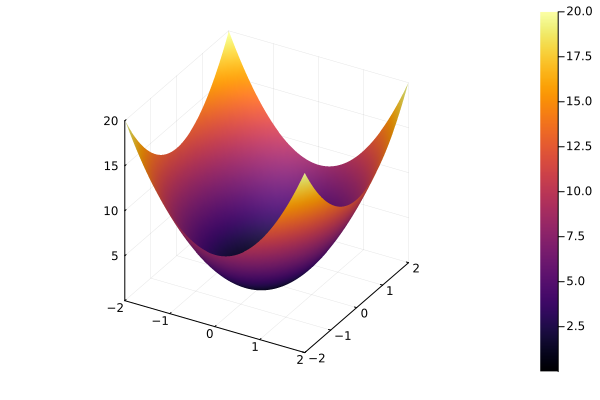

In [44]:
## Pensemos 
## 1

f(x, y) = 3*x^2 + 2*y^2

xs = range(-2, 2, length=100)
ys = range(-2, 2, length=100)

surface(xs, ys, f)

## definida positiva

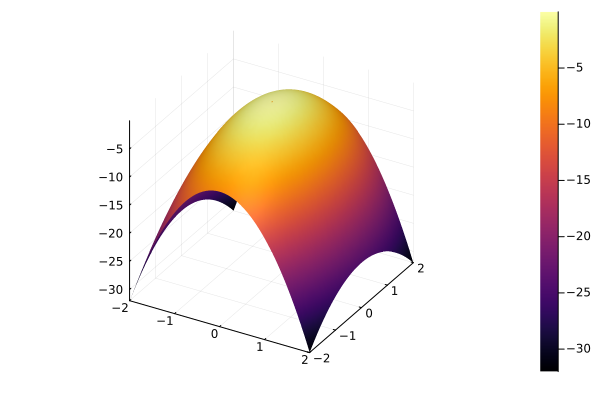

In [45]:
f(x, y) = -3*x^2 - (3*x^2 + 2*y^2)

xs = range(-2, 2, length=100)
ys = range(-2, 2, length=100)

surface(xs, ys, f)

## definida negativa

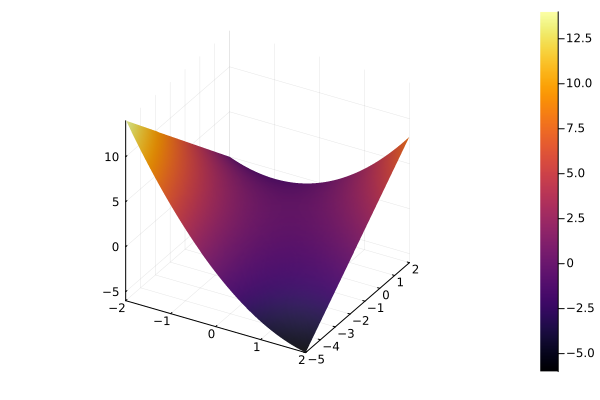

In [46]:
f(x, y) = x^2 + (x*y)

xs = range(-2, 2, length=100)
ys = range(-5, 2, length=100)

surface(xs, ys, f)

## indefinida

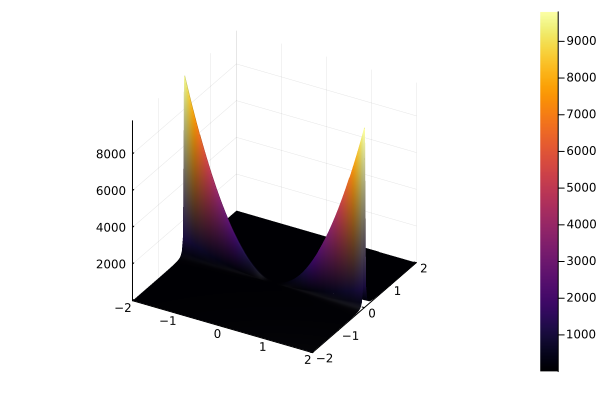

In [47]:
f(x, y) = x^2 + (x/y)^2

xs = range(-2, 2, length=100)
ys = range(-2, 2, length=100)

surface(xs, ys, f)

## definida positiva

ComplexF64[-0.5 + 0.8660254037844385im, -0.5 - 0.8660254037844385im]
TransferFunction{Continuous, ControlSystemsBase.SisoRational{Int64}}
     1
-----------
s^2 + s + 1

Continuous-time transfer function model

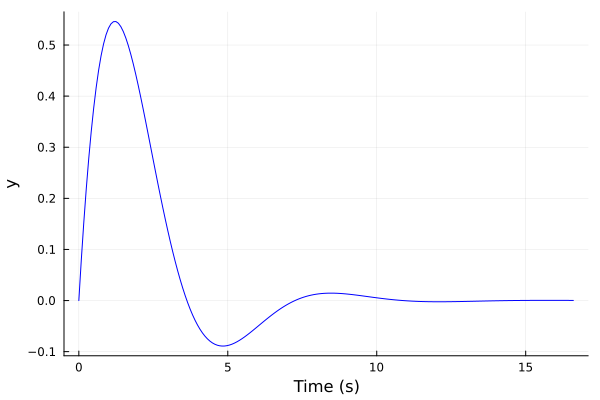

In [48]:
## 2 
## dado un sis con polos a la izq y UN polo en el origen, es bibo estable?

sys = tf([1], [1, 1, 1]) #zpk([0], [0, -1], 1)

print(poles(sys))
print("\n")
print(sys)

plot(impulse(sys), l=:blue)


## aparentemente sí, a pesar del sobrepico (esperado), se establece en cero y luego no diverge

In [57]:
using Pkg
Pkg.add("Symbolics");
Pkg.add("MatrixEquations")
Pkg.add("Polynomials")

## disclaimer: esto no lo agregué a la imagen base de docker 
## porque el pkg de ControlSystems cambió tantas veces tan radicalmente que tengo miedo que se me rompa algo

   Resolving package versions...
   Installed MatrixEquations ─ v2.2.10
    Updating `~/.julia/environments/v1.8/Project.toml`
  [99c1a7ee] + MatrixEquations v2.2.10
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [99c1a7ee] ↑ MatrixEquations v2.2.9 ⇒ v2.2.10
Precompiling project...
  ✓ MatrixEquations
  ✓ ControlSystemsBase
  ✓ ControlSystems
  3 dependencies successfully precompiled in 35 seconds. 284 already precompiled.
  3 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [58]:
using Symbolics
using MatrixEquations
using Polynomials

In [55]:
## Problemas

## 11.1
f(x, y, z) = 10*x^2 + 4*y^2 + z^3 + 2*x*y - 2*y*z - 4*x*z

xs = range(-2, 2, length=100)
ys = range(-2, 2, length=100)
zs = range(-2, 2, length=100)

## surface(xs, ys, zs, f)

## no puedo graficarla, pero debería ser definida positiva

@variables p11 p12 p13 p21 p22 p23 p31 p32 p33
@variables x1 x2 x3
P = [p11 p12 p13; p21 p22 p23; p31 p32 p33]
A = [x1 x2 x3]

A*P*transpose(A)

P = [10 0 -4; 2 4 0; 0 -2 1]

det(P)

## todos los menores inferiores/superiores son positivos
## Y el determinante también es positivo
## cumple con la rem 11.1 y con el criterio de Sylvester

56.0

Función de Lyapunov: Num[x2*(0.11224489795918363x1 + 0.15816326530612246x2) + x1*(0.11224489795918363x2 + 0.2755102040816325x1)]
Derivada de la función de Lyapunoṿ: Num[-(x1^2) - (x2^2)]


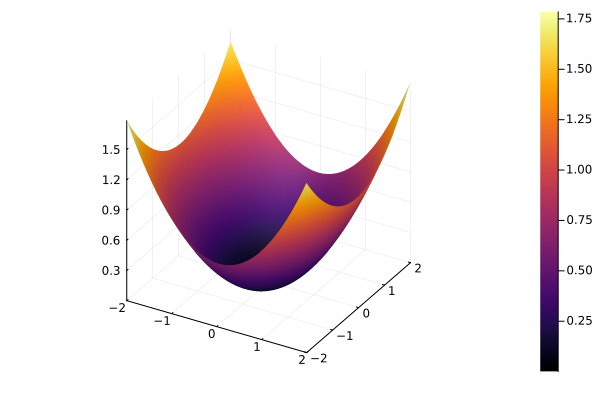

In [60]:
## 11.2

A = [-1 -2; 4 -6]
Q = [1 0; 0 1]
v = lyapc(A, Q)

@variables x1 x2
V = [x1 x2]*v*[x1, x2]

print("Función de Lyapunov: ")
print(V)
print("\n")

dV = -[x1 x2]*Q*[x1, x2]

print("Derivada de la función de Lyapunoṿ: ")
print(dV)
print("\n")


# dado que V es definida positiva y dV es definida negativa, el 
# estado de equilibrio en el origen es uniforme y asintóticamente estable


# tengo que simplificar V así porque si no se rompe la func de ploteo
f(x, y) = 0.27551*x^2 + 0.15816*y^2 + 0.11224^2*x*y

xs = range(-2, 2, length=100)
ys = range(-2, 2, length=100)

surface(xs, ys, f)

In [61]:
## 11.3

P = [p11 p12; p21 p22]
A = [0 1; 2 -1]
Q = [1 0; 0 1]

v = lyapd(A, Q) # no es posible encontrar una única función de lyapunov

LoadError: "ME:SingularException: A has eigenvalue(s) with moduli ≈ 1"

## Capítulo XII

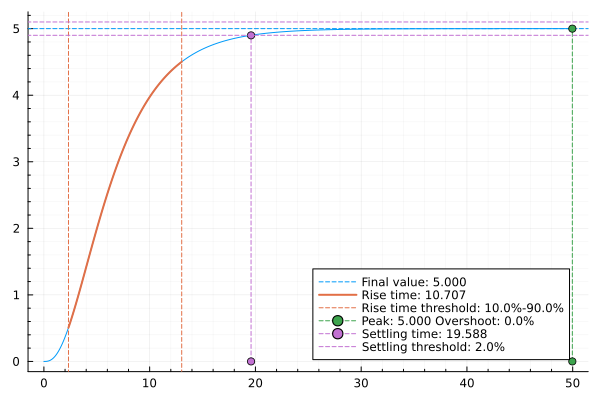

In [62]:
s = tf("s")
sys = 5 / ((s + 1)*(2*s + 1)*(4*s + 1))

# la documentación de julia no es clara sobre como pasar de tf a ss
# tuve que escribir esto a mano
A = [0 0 -0.125; -1 0 0.875; 0 -1 -1.75]
B = [-5; 0; 0]
C = [0 0 -0.125]

sys_ss = ss(A, B, C, 0);

# matriz de controlabilidad

mC = [sys_ss.B sys_ss.A*sys_ss.B (sys_ss.A)^2*sys_ss.B]

p1 = complex(-2, sqrt(2))
p2 = complex(-2, -sqrt(2))
p3 = - 5

Ack = [p1 0 0 ; 0 p2 0 ; 0 0 p3 ]

characteristic_polynomial = fromroots(Ack)

phiA = characteristic_polynomial(sys_ss.A)

K = [0 0 1] * (inv(mC)) * phiA

#pzmap(sys)
## simulación del sistema original
step_sys = step(sys_ss, 50)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

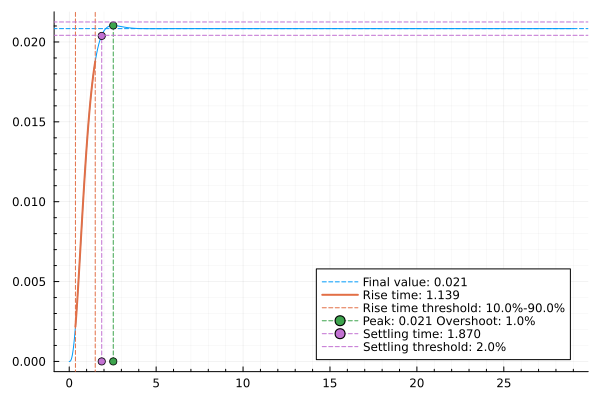

In [63]:
## simulación del sistema con K

sys_rl = ss(A-B*K, B, C, 0)

#pzmap(sys_rl)
step_sys = step(sys_rl)
step_info = stepinfo(step_sys)

plot(step_sys)
plot(step_info)
plot!(minorgrid=true)

## le cuesta mucho menos la estabilidad, no consume tanta energía

In [64]:
# 12.4

# considerar la misma planta del ejercicio anterior, 
# pero ahora diseñar un observador de orden completo

s = tf("s")
sys = 5 / ((s + 1)*(2*s + 1)*(4*s + 1))

# la documentación de julia no es clara sobre como pasar de tf a ss
# tuve que escribir esto a mano
A = [0 0 -0.125; -1 0 0.875; 0 -1 -1.75]
B = [-5; 0; 0]
C = [0 0 -0.125]

sys_ss = ss(A, B, C, 0);

# matriz de observabilidad

mO = [sys_ss.C ; sys_ss.C * sys_ss.A;  sys_ss.C * sys_ss.A^2]

p1 = complex(-0.1, sqrt(0.2))
p2 = complex(-0.1, -sqrt(0.2))
p3 = -0.1

#mP = [ p1 p2 ]
Ack = [p1 0 0 ; 0 p2 0 ; 0 0 p3 ]

characteristic_polynomial = fromroots(Ack)

phiA = characteristic_polynomial(sys_ss.A)

K = phiA*(inv(mO))*[0; 0; 1]

3-element Vector{Float64}:
  0.832
 -5.16
 11.6